# *프로세스의 주소공간*

## **목차**

---
##### 1. 주소공간이란?   

##### 1. 프로세스의 주소공간      

##### 2. 프로세스 주소공간의 세부 내용   


---

## **1. 주소공간이란?**
   
#### 1. CPU 주소 공간 (CPU address space)
- CPU 주소 공간이란 CPU가 **접근할 수 있는** 전체 메모리 공간을 의미한다.

    - 최대 크기 : 주소 버스 수에 의해 결장
        - if 32비트 CPU -> 32개의 주소선 -> 2^32 -> 4GB
            - 주소 공간은 0번지부터 시작
            - 하나의 주소가 가리키는 공간은 1 Byte 영역
    
    - CPU 주소 공간보다,
        - 큰 메모리가 장착되어 있어도 접근 불가
        - 작은 메모리가 장착되어 있는 경우엔 접근 가능
            - 단, CPU가 설치된 메모리의 주소 영역을 넘어 접근하면 시스템 오류 발생

#### 2. 프로세스의 메모리 구성
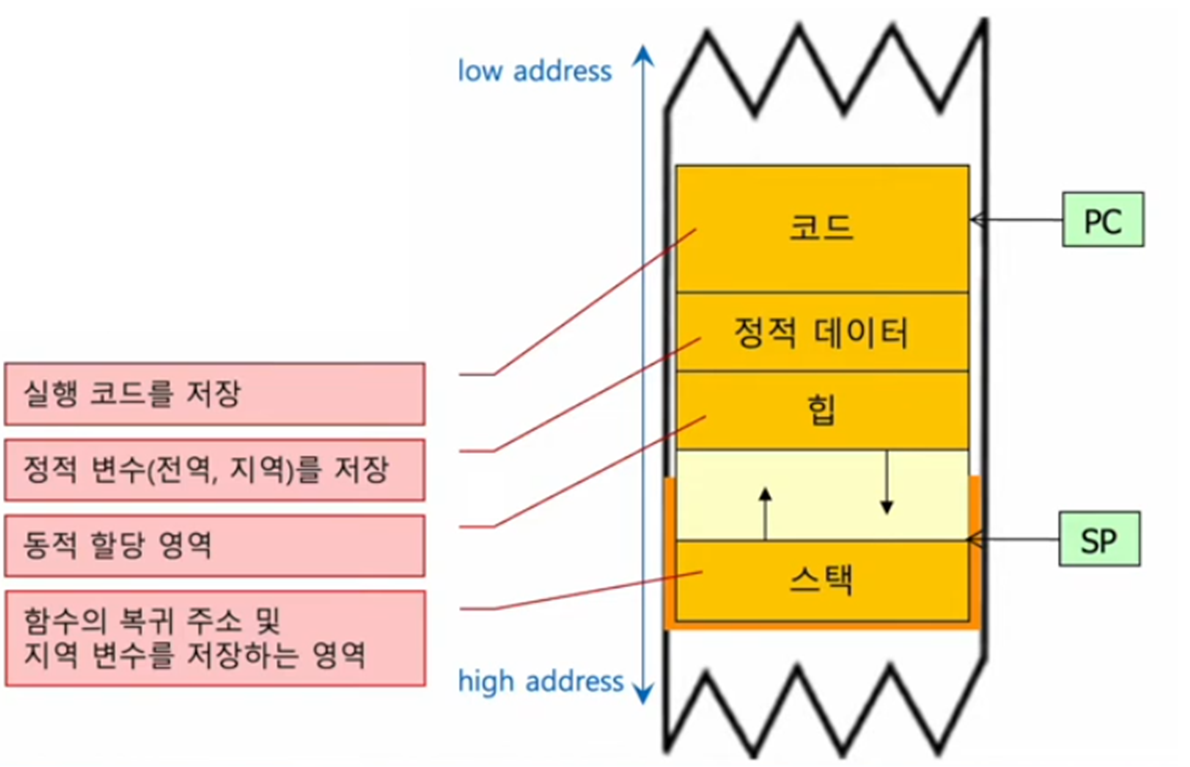
- 프로세스는 프로그램과 달리 주기억장치에 주소 공간을 가진다.
- 현재의 활동 요소를 갖는 능동적인 개체임
    - 프로세서(processor)의 레지스터에 의해 표현


---



## **2. 프로세스의 주소공간**

#### 1. 프로세스의 주소공간   

- 프로세스가 실행 중에 접근할 수 있도록 허용된 주소의 최대 범위
    - 가상적인 논리 공간
        - 0번지부터 시작해서 연속적
        - 사용자 공간 + 커널 공간
    
    - CPU 주소 공간과 같음

    - 프로세스 주소 공간의 크기
        - CPU가 접근할 수 있는 최대 크기 : 32비트 CPU -> 4GB
        - 단, 프로세스의 '현재 크기'와는 다름
            - 코드/데이터 영역 크기(각 프로세스마다 고정된 크기) + '현재 할당된' 힙/스택 영역의 크기 (가변적)
            - 실행 중에 계속 변함
    
    - 프로세스 주소 공간의 예 : 32bit CPU, 리눅스
        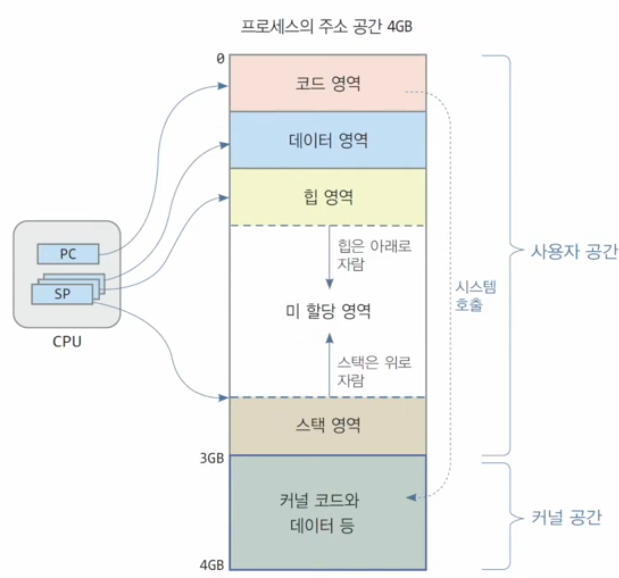

#### 2. 커널 공간의 의미    

- 프로세스가 사용자 코드에서 시스템 호출을 통해 커널 코드를 실행할 때 사용되는 공간
    - 사용자 프로세스가 커널 모드에서 실행되고 있다고 함
        - 커널 코드를 실행하는 주체는 사용자 프로세스
    
    - 사용자 영역과 커널 영역을 하나의 가상 주소 영역으로 다룬다.
        - 커널 코드가 적재된 물리 메모리 위치 역시 사용자 프로세스가 소유한 매핑 테이블 사용
        - 단, 커널 코드는 물리 메모리 공간에서 분산되어있는 코드임으로 같은 공간에 존재하지 않을 수 있다.
        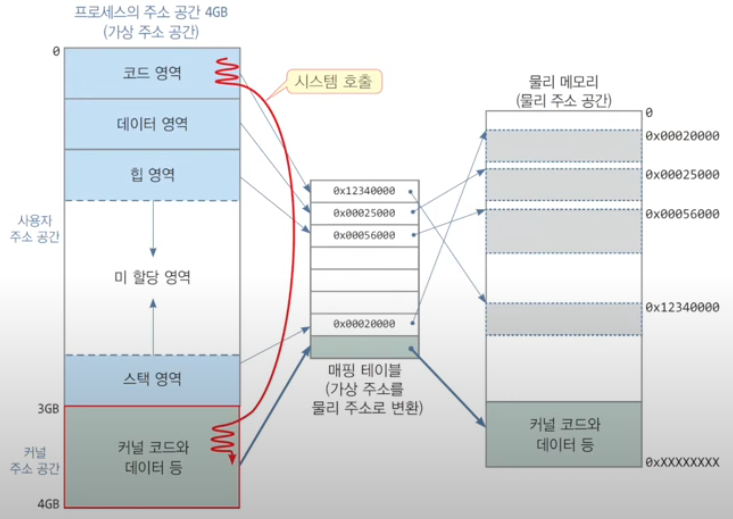

#### 3. 프로세스 주소 공간의 특징

- 프로세스 주소 공간은 각 프로세스 별로 할당된 가상 공간   
    - 사용자나 개발자가 보는 관점
        - 자신이 작성한 프로그램이 0번지부터 시작하여 연속적인 메모리 공간에 형성된다고 생각한다.
        - CPU가 접근할 수 있는 최대 크기의 메모리가 설치되어 있다고 생각한다.
    
    - 실제 상황
        - 설치된 물리 메모리의 크기는 프로세스 주소 공간보다 작을 수 있음
        - 코드, 데이터, 힙, 스택은 물리 메모리에 흩어져 저장됨
            - 연속 할당이 아니다.

#### 4. 가상주소 공간과 물리 메모리   

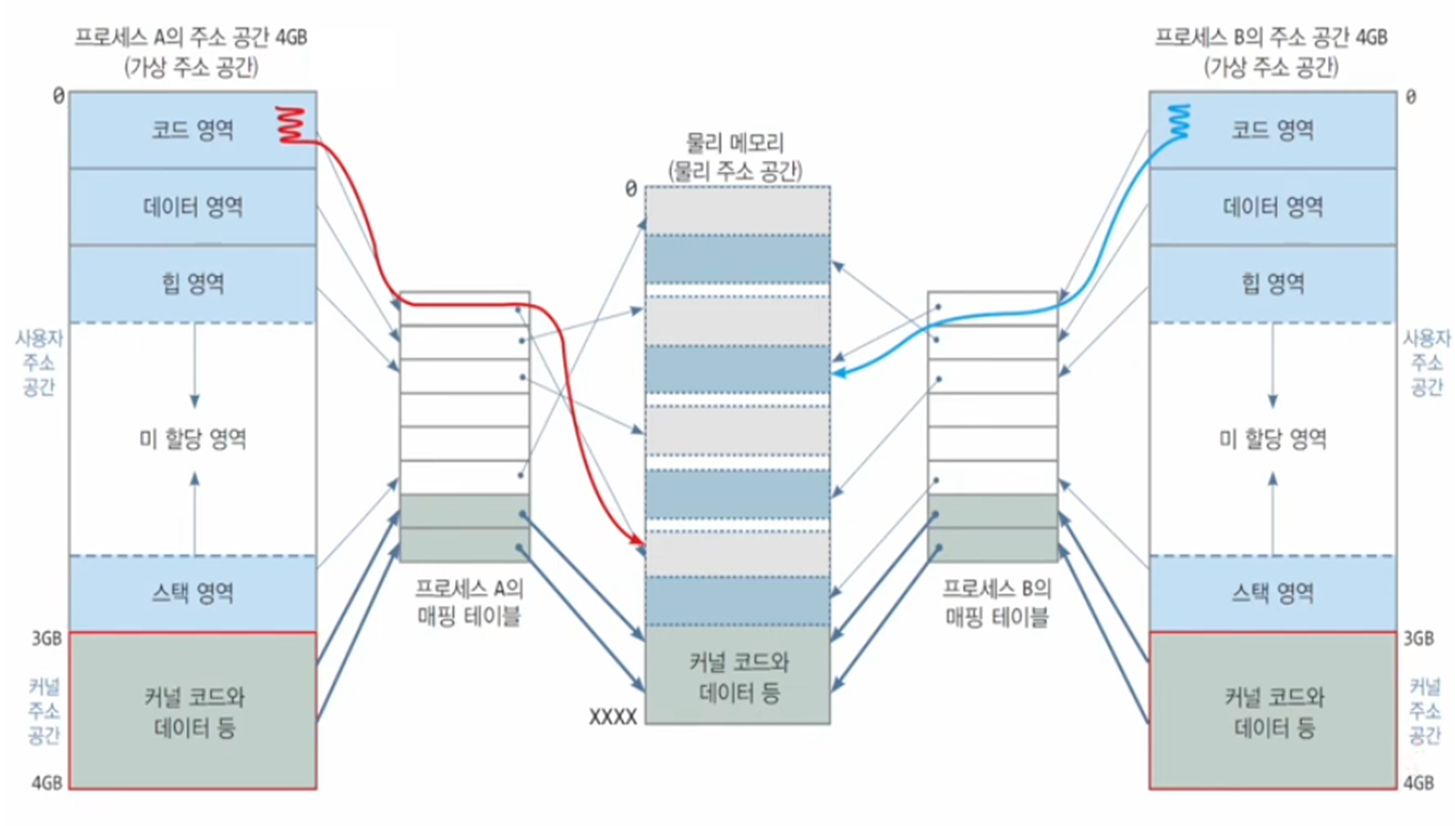


---


## 3. 프로세스 주소공간의 세부 내용   

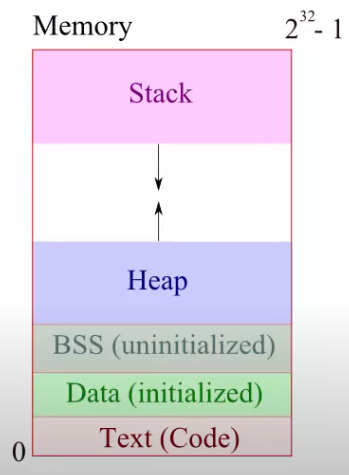   
- 프로세스의 주소공간(Process Address Space)은 프로그램이 실행되면 메모리에 할당되는 것을 의미한다.
- 프로세스 주소 공간은 효율적인 데이터 공유와 메모리 사용을 위하여 메모리 영역을 나누어 실행된다.
    - Why? -> 메모리는 한정되어 있기 떄문에 자원을 절약해서 쓰기 위해..
- 위의 이미지는 0부터 2^32 -1 까지 32비트 형태의 메모리 저장 형식이다. (64비트와 유사하므로 해당 이미지를 참고)
- 기본적으로 하나의 프로그램이 실행이 되고 프로세스가 띄워지면, 실제로 메인 메모리 상에서 하나의 세그먼트는 위와 같이 형성됨


#### - 주소공간의 영역별 특징
- 주소공간은 총 4개의 영역으로 Text(Code), Data(initialized), BSS(uninitialized) Heap, Stack으로 나뉘어져 있다.   

    - Text(Code) 영역
        - 사용자가 등록한 소스 코드가 들어가는 공간 (실제적인 명령어 => 컴파일 된 상태)
        - 프로그램이 실행되면 어셈블리의 코드들이 하나하나씩 실행되면서 프로그램이 실행된다.
        - 프로그램이 실행될 수 있도록 CPU가 해석 가능한 기계어 코드가 저장되어 있는 공간
        - 프로그램이 수정되면 안되므로 ReadOnly 상태로 저장되어 있다.
           
    - Data 영역
        - 전역 변수나 Static 변수 등 프로그램이 사용할 수 있는 데이터를 저장하는 영역
        - 어떤 프로그램에 전역/Static 변수를 참조하는 코드가 존재한다면,   
        이 프로그램은 컴파일 된 후에 data 영역을 참조하게 된다.
        - 프로그램의 시작과 함께 할당되며, 프로그램이 종료되면 소멸한다.
        - 단, 초기화 되지 않는 변수가 존재한다면, 이는 BSS 영역에 저장된다.
           
    - BSS 영역
        - 프로그램에서 사용될 변수들이 실제로 위치하는 영역
        - 전역으로 선언된 초기화 하지 않은 변수는 BSS에 저장된다.
           
    - Heap 영역
        - 동적할당 변수(malloc(), new 등)를 위한 메모리 영역
        - 런타임(동적 할당의 경우)에 크기가 정해진다.
        - 메모리의 낮은 주소에서 높은 주소의 방향으로 할당된다.
        - 주로 객체가 저장된 Garbage Collector에 의해 정리된다.
           
    - Stack 영역
        - 함수의 실행을 마치고 복귀할 주소, 데이터(지역 변수, 매개 변수, 반환값)를 임시로 저장하는 공간이다.
        - 각 함수는 LIFO 구조로 실행된다.
            - 컴파일 시 크기가 결정된다.
            - 재귀 함수가 여러 번 호출되거나 지역 번수가 많아지면 Stack Overflow가 발생할 수 있다.
        - 메모리의 높은 주소에서 낮은 주소의 방향으로 할당된다.
        - 실행 중에 변수가 수정될 수 있기에 Read-Write로 지정되어있다.
        - 함수의 호출과 함께 할당되고, 함수 호출 완료 시 소멸된다.

